<a href="https://colab.research.google.com/github/rishuagrawal1309/Machine_Learning/blob/main/Divisive_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [2]:
fruit_tree = {
    "All Fruits": {
        "Citrus": ["Orange", "Lemon"],
        "Non-Citrus": {
            "Berries": ["Strawberry", "Blueberry"],
            "Others": ["Apple", "Banana"]
        }
    }
}

In [3]:
def compute_positions(tree, x=0, y=0, dx=2):
    positions = {}
    if isinstance(tree, dict):
        all_child_positions = {}
        total_width = 0
        child_centers = []
        for key, subtree in tree.items():
            sub_pos, sub_width = compute_positions(subtree, x + total_width * dx, y - 2, dx)
            all_child_positions.update(sub_pos)
            child_center_x = sum(pos[0] for pos in sub_pos.values()) / len(sub_pos)
            child_centers.append((key, child_center_x))
            total_width += sub_width
        center_x = sum(center for _, center in child_centers) / len(child_centers)
        positions = {key: (center, y) for key, center in child_centers}
        positions.update(all_child_positions)
        return positions, total_width
    elif isinstance(tree, list):
        for i, item in enumerate(tree):
            positions[item] = (x + i * dx, y)
        return positions, len(tree)
    return {}, 0

In [4]:
def extract_edges(tree, parent=None):
    edges = []
    if isinstance(tree, dict):
        for key, subtree in tree.items():
            if parent:
                edges.append((parent, key))
            edges.extend(extract_edges(subtree, key))
    elif isinstance(tree, list):
        for item in tree:
            if parent:
                edges.append((parent, item))
    return edges

In [5]:
def plot_tree(tree):
    positions, _ = compute_positions(tree)
    edges = extract_edges(tree)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('off')

    for parent, child in edges:
        if parent in positions and child in positions:
            x1, y1 = positions[parent]
            x2, y2 = positions[child]
            ax.plot([x1, x2], [y1, y2], 'k-')

    for node, (x, y) in positions.items():
        if node == "All Fruits":
            color = "lightblue"
        elif node in ["Citrus", "Non-Citrus", "Berries", "Others"]:
            color = "lightgreen"
        else:
            color = "lightyellow"
        ax.text(x, y, node, ha='center', va='center',
                bbox=dict(boxstyle="round", facecolor=color, edgecolor="black"))

    plt.title("Divisive Clustering Tree: Fruit Classification", fontsize=14)
    plt.tight_layout()
    plt.show()

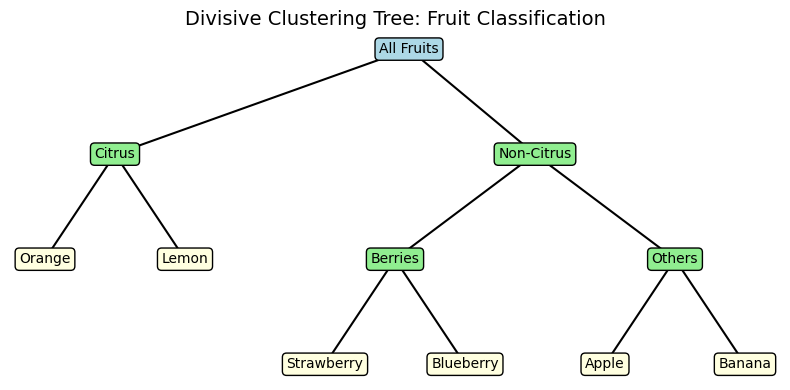

In [6]:
plot_tree(fruit_tree)